In [21]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [9]:
!pip install kaggle


In [10]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naidu2002","key":"17962bf710d7013a971611518a125c78"}'}

In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [12]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 417M/428M [00:02<00:00, 110MB/s]
100% 428M/428M [00:02<00:00, 158MB/s]


In [14]:
import zipfile

zip_path = "/content/toronto-emotional-speech-set-tess.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [17]:
import os

# Define the dataset path (update if necessary)
dataset_path = "/content/dataset/"

# Initialize lists
paths = []
labels = []

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith(".wav"):  # Ensure only audio files are processed
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]  # Extract label from filename
            label = label.split('.')[0]  # Remove file extension
            labels.append(label.lower())  # Convert label to lowercase

print("Dataset is loaded successfully!")
print(f"Total samples: {len(paths)}")


Dataset is loaded successfully!
Total samples: 5600


In [22]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/dataset/TESS Toronto emotional speech...,angry
1,/content/dataset/TESS Toronto emotional speech...,angry
2,/content/dataset/TESS Toronto emotional speech...,angry
3,/content/dataset/TESS Toronto emotional speech...,angry
4,/content/dataset/TESS Toronto emotional speech...,angry


In [23]:
df['label'].value_counts()


,count
label,
angry,800
happy,800
fear,800
disgust,800
sad,800
neutral,800
ps,800


In [24]:
df['label'].value_counts()


,count
label,
angry,800
happy,800
fear,800
disgust,800
sad,800
neutral,800
ps,800


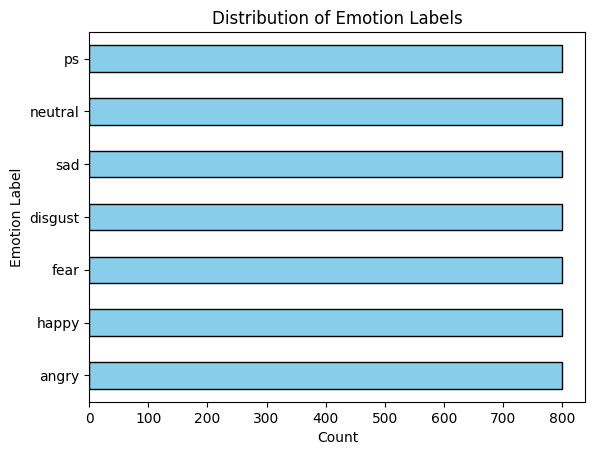

In [26]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Count")
plt.ylabel("Emotion Label")
plt.title("Distribution of Emotion Labels")
plt.show()


In [27]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)  # Use waveshow instead of waveplot
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))  # Fixed function name
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()  # Ensure the plot is displayed properly


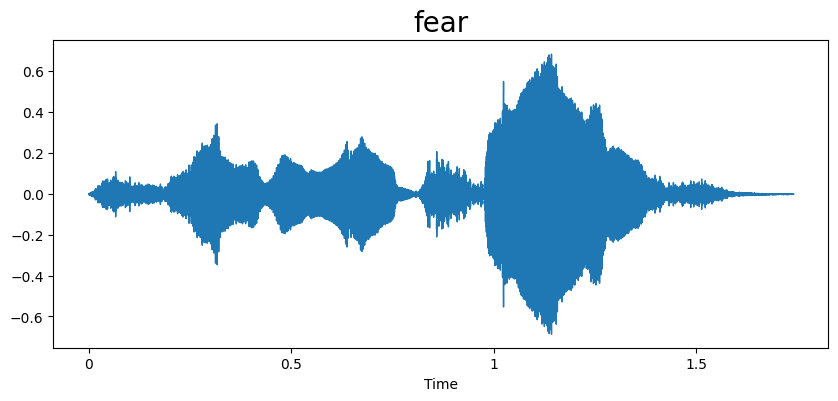

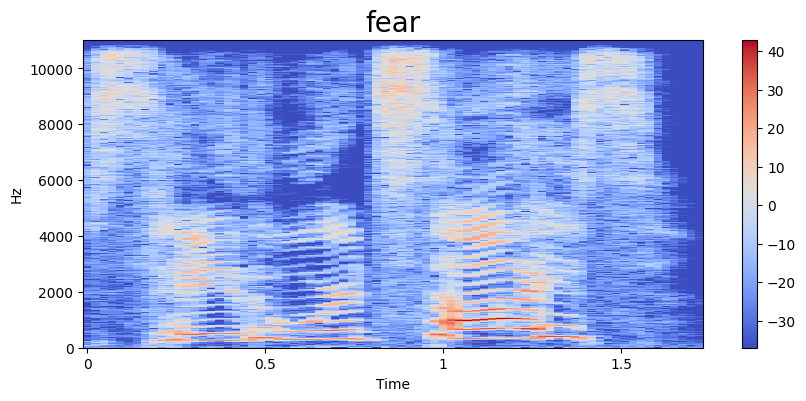

In [28]:
# Select speech sample corresponding to the emotion
emotion = 'fear'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[0]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

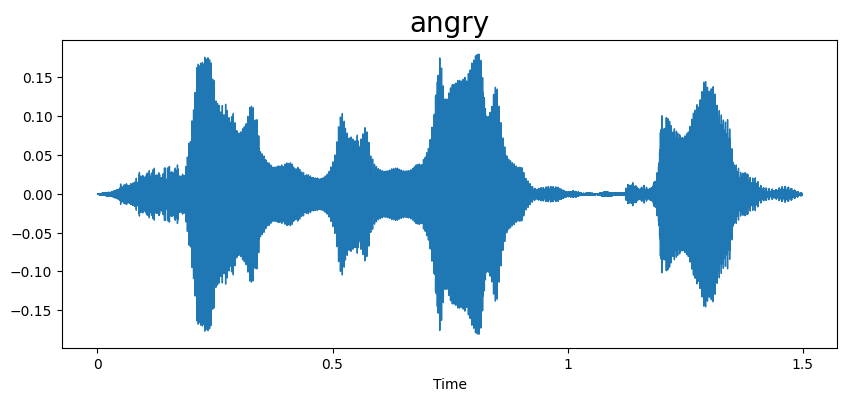

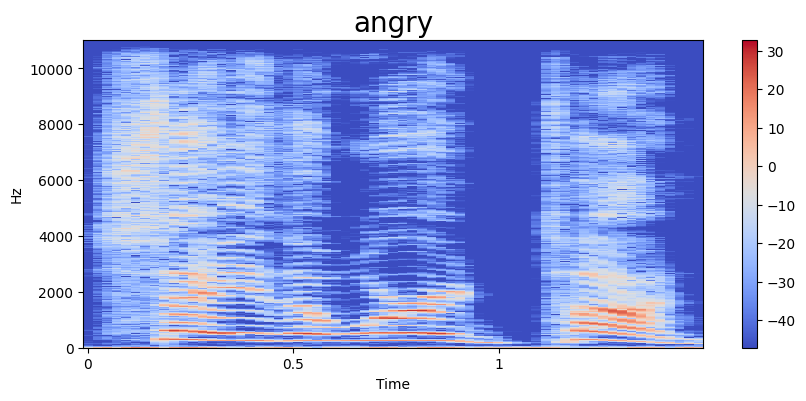

In [29]:
emotion = 'angry'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[1]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

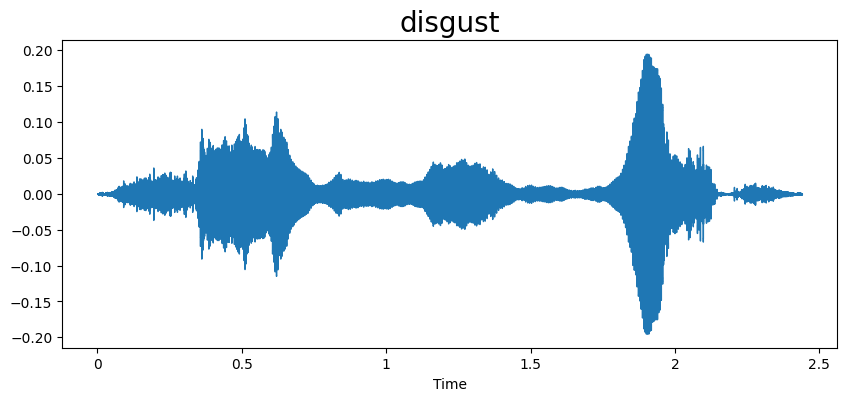

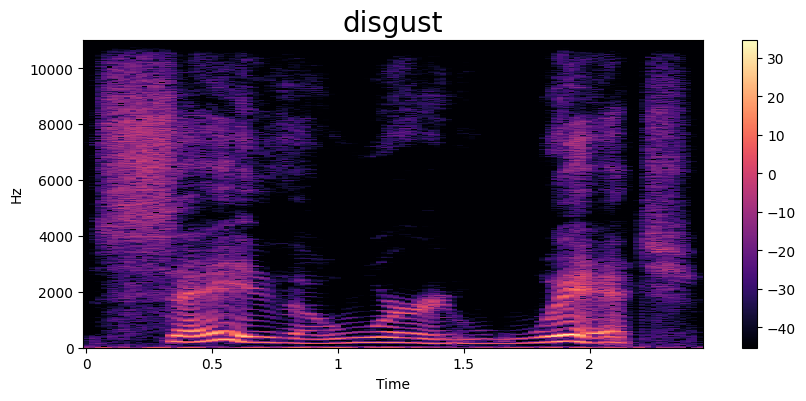

In [30]:
emotion = 'disgust'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[1]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

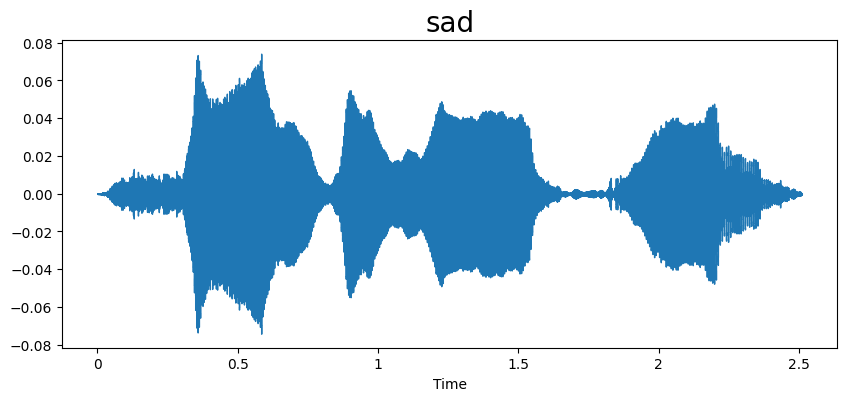

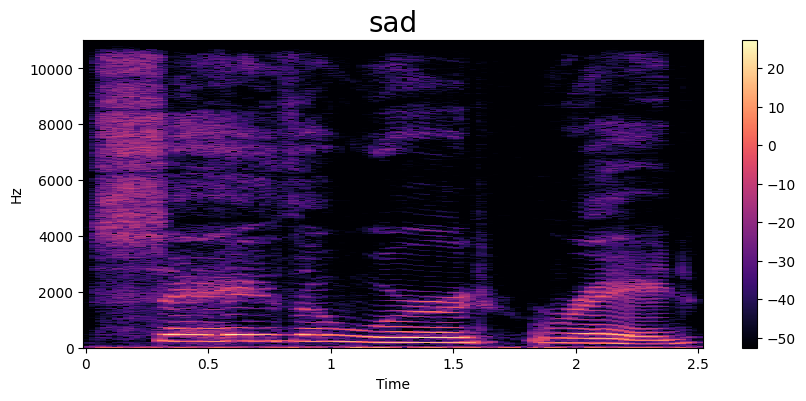

In [31]:
emotion = 'sad'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[0]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

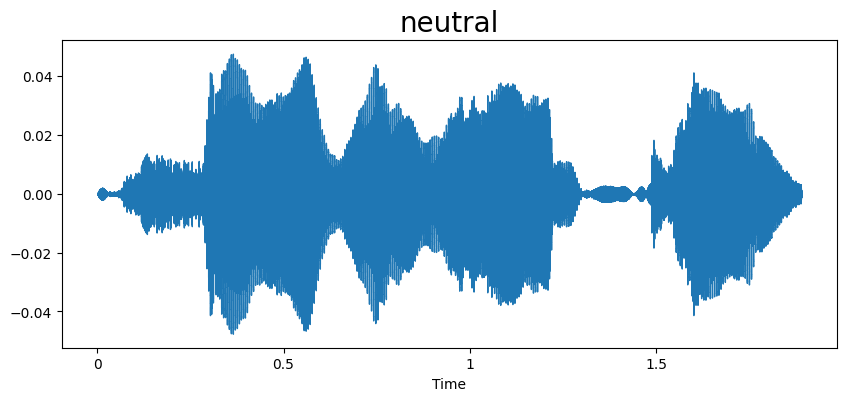

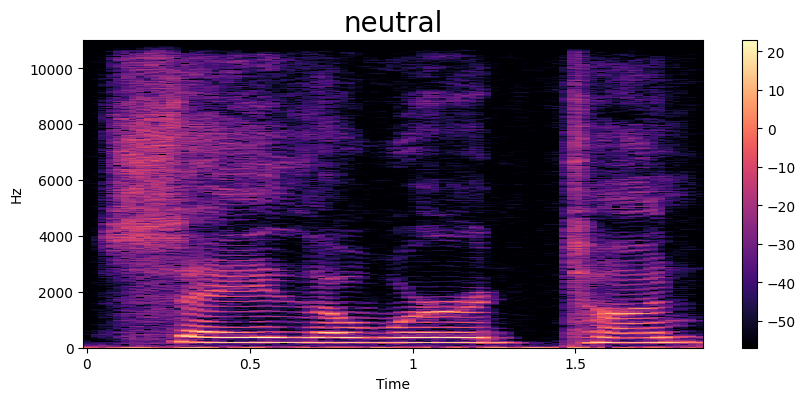

In [32]:
emotion = 'neutral'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[0]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

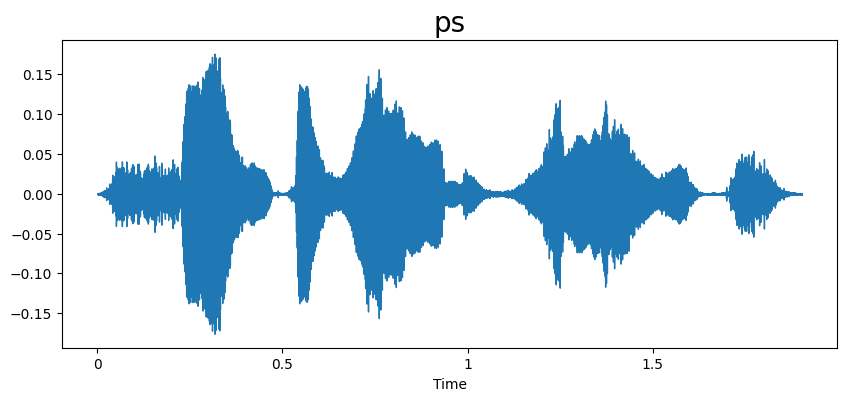

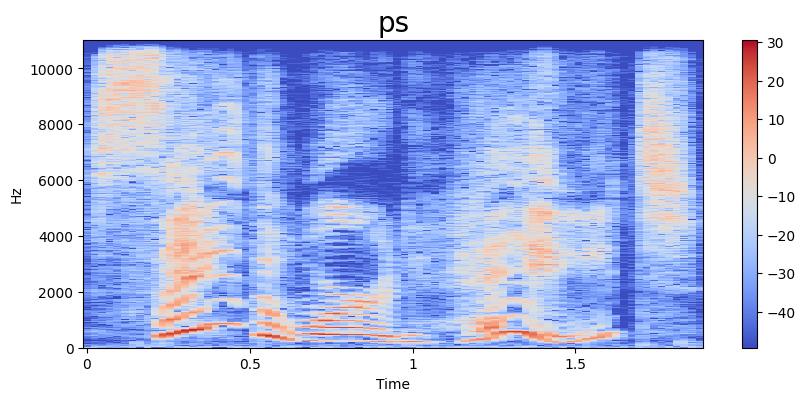

In [33]:
emotion = 'ps'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[0]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

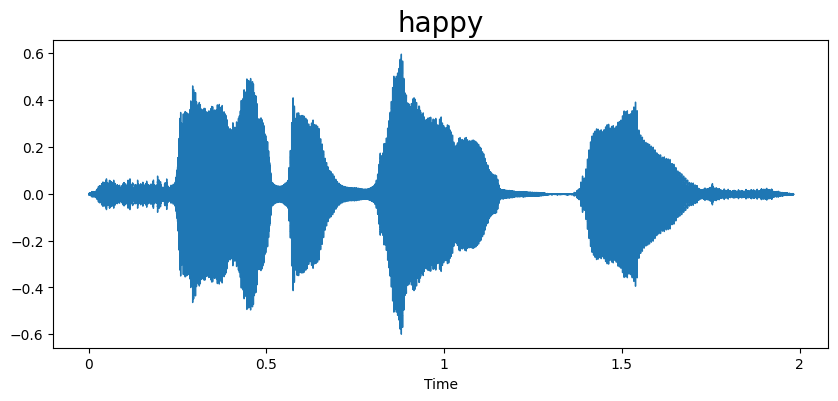

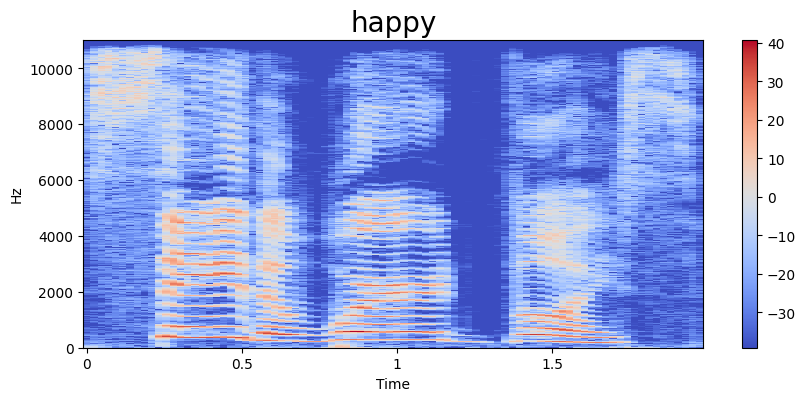

In [34]:
emotion = 'happy'

# Ensure we select a single path correctly
paths = df.loc[df['label'] == emotion, 'speech'].values

if len(paths) > 0:
    path = paths[1]  # Select the first file if multiple exist
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No audio files found for emotion: {emotion}")
Audio(path)

In [35]:
def extract_mfcc(filename):
    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Fixed typo from maen to mean
        return mfcc
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None  # Return None if there's an error

# Test the function
mfcc_features = extract_mfcc(df['speech'][0])

if mfcc_features is not None:
    print("MFCC extracted successfully.")
else:
    print("MFCC extraction failed.")

MFCC extracted successfully.


In [36]:
extract_mfcc(df['speech'][0])


array([-403.40585   ,   83.16034   ,   -2.5043783 ,  -15.493323  ,
          3.4254184 ,   22.688225  ,  -28.11579   ,  -27.108515  ,
        -18.101841  ,   -4.898166  ,   -5.664504  ,   -2.8359032 ,
          0.56760424,   -1.1823541 ,   -6.605393  ,   -2.537489  ,
         -9.1554165 ,   -3.151764  ,   -5.0381107 ,   -7.695432  ,
         -4.5295525 ,   -2.538152  ,   -8.257582  ,    1.8276101 ,
          4.341545  ,   16.53454   ,   16.04424   ,   24.19464   ,
         13.181751  ,   14.748323  ,    7.60464   ,    5.75911   ,
         15.640238  ,    6.7654133 ,   10.570378  ,    1.205935  ,
          3.9196236 ,   11.238584  ,    1.8967104 ,    1.4873405 ],
      dtype=float32)

In [37]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))


In [38]:
x_mfcc


,speech
0,"[-403.40585, 83.16034, -2.5043783, -15.493323,..."
1,"[-437.882, 86.159096, -5.2926884, -23.754158, ..."
2,"[-468.8798, 63.885868, -2.731425, -7.891333, 8..."
3,"[-380.22937, 61.289772, 2.4108977, -6.4119143,..."
4,"[-415.52567, 64.01048, -0.36642435, -6.0802464..."
...,...
5595,"[-398.21106, 97.3146, -7.469132, 27.0984, -2.1..."
5596,"[-426.65347, 96.29788, 9.832417, 27.683088, -1..."
5597,"[-411.35928, 81.070946, -3.5014722, 34.19444, ..."
5598,"[-418.2315, 92.82211, 8.911688, 33.609295, 6.5..."


In [39]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(5600, 40)

In [41]:
x=np.expand_dims(x,-1)
x=np.array(x)
x.shape

(5600, 40, 1)

In [42]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])  # Convert strings to integers

# Convert to categorical (one-hot encoding)
y_categorical = to_categorical(y_encoded)

# Check shape
print(y_categorical.shape)

(5600, 7)


In [43]:
from keras.models import Sequential  # Fix import path
from keras.layers import Dense, LSTM, Dropout

# Define the model
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),  # Fix return_sequences=True if needed
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Fix typo in 'metrics'

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history=model.fit(x,y_categorical,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 419ms/step - accuracy: 0.2306 - loss: 1.8909 - val_accuracy: 0.2812 - val_loss: 1.7507
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.4431 - loss: 1.5978 - val_accuracy: 0.4045 - val_loss: 1.5774
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.5725 - loss: 1.2501 - val_accuracy: 0.5134 - val_loss: 1.3094
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6673 - loss: 0.9312 - val_accuracy: 0.5973 - val_loss: 1.0719
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.7533 - loss: 0.6990 - val_accuracy: 0.6786 - val_loss: 0.8120
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.8219 - loss: 0.5133 - val_accuracy: 0.7268 - val_loss: 0.6656
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.8736 - loss: 0.3726 - val_accuracy: 0.7884 - val_loss: 0.5056
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.9037 - loss: 0.2924 - val_accuracy: 0.8295 - v

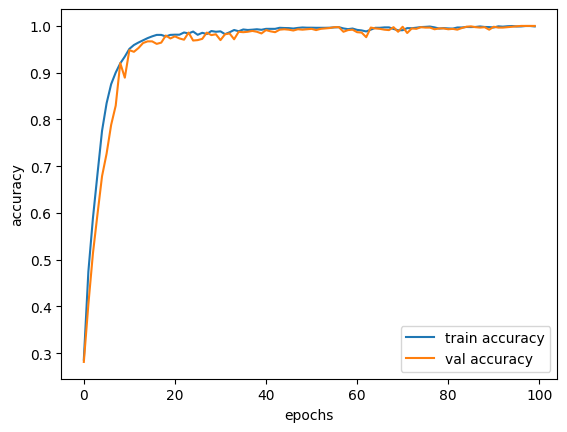

In [45]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

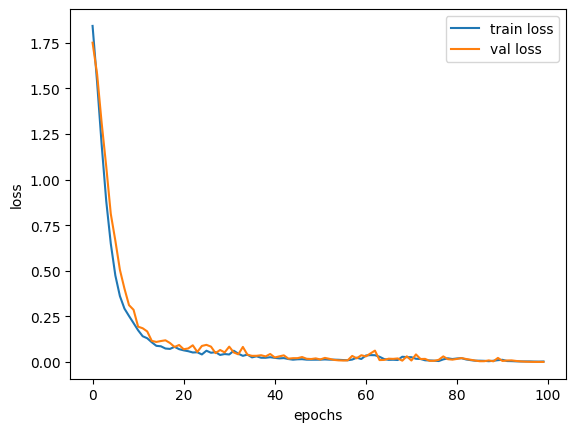

In [46]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
model.save("Speech_Emotion_Recognition.h5")  # Save the model
print("Model saved successfully!")

Model saved successfully!
